In [20]:
import numpy as np

samples = ['The cat sat on the mat', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [21]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [22]:
max_length=10

results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values())+1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [23]:
results[0]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
# Using Keras

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat', 'The dog ate my homework.']

# Initialize a tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [34]:
word_index # keras does a few things more

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [35]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

In [47]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [50]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 0s 24us/step - loss: 0.6714 - acc: 0.6163 - val_loss: 0.6186 - val_acc: 0.7076
Epoch 2/10
20000/20000 [==============================] - 1s 32us/step - loss: 0.5399 - acc: 0.7525 - val_loss: 0.5184 - val_acc: 0.7446
Epoch 3/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.4600 - acc: 0.7865 - val_loss: 0.4919 - val_acc: 0.7558
Epoch 4/10
20000/20000 [==============================] - 1s 31us/step - loss: 0.4221 - acc: 0.8079 - val_loss: 0.4860 - val_acc: 0.7602
Epoch 5/10
20000/20000 [==============================] - 1s 30us/step - loss: 0.3968 - acc: 0.8220 - val_loss: 0.4846 - val_acc: 0.7626
Epoch 6/10
20000/20000 [==============================] - 1s 30us/step - loss: 0.3753 - acc: 0.8344 - val_loss: 0.4871 - val_acc: 0.7652
Epoch 7/10
20000/20000 [==============================] - 1s 30us/step - loss: 0.3569 - acc: 0.8457 - val_loss: 0.4913 - val_acc:

In [116]:
# From scratch using word-embeddings

# Download from http://mng.bz/0tIo (uncompress it.)
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append((f.read()))
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [118]:
texts[0]

'As a teenager, I was pretty into the whole Bigfoot thing - I read the books and followed the reported sightings. As a more jaded adult, I\'ve largely given up on the big guy now, but don\'t mind watching the odd movie when I come across one. This one had a few strong points to it - mainly, the recreations of two of the more famous Bigfoot encounters - the Ape Canyon incident of 1924 and the Bauman incident of c.1850 as related to and by Teddy Roosevelt, both of which I\'m somewhat familiar with from that youthful reading I did. The movie takes for granted that both incidents involved a sasquatch, whereas both incidents have more plausible explanations, but the recreations were well done. There\'s also homage paid at the beginning of the movie to the famous Patterson video, again taking for granted its authenticity. The sasquatch encounter at the end of the movie was also very well done and had a very creepy feel to it as the sasquatch were portrayed mainly in the shadows or as hairy f

In [119]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [122]:
sequences[0]

[14,
 3,
 2338,
 10,
 13,
 181,
 80,
 1,
 223,
 8422,
 151,
 10,
 329,
 1,
 1148,
 2,
 1474,
 1,
 8169,
 14,
 3,
 50,
 6627,
 1155,
 204,
 2253,
 345,
 53,
 20,
 1,
 191,
 229,
 147,
 18,
 89,
 327,
 146,
 1,
 1028,
 17,
 51,
 10,
 213,
 635,
 28,
 11,
 28,
 66,
 3,
 168,
 562,
 753,
 5,
 9,
 1418,
 1,
 4,
 104,
 4,
 1,
 50,
 800,
 8422,
 3264,
 1,
 4174,
 5399,
 3840,
 4,
 2,
 1,
 3840,
 4,
 1144,
 14,
 2463,
 5,
 2,
 31,
 8926,
 196,
 4,
 60,
 143,
 640,
 1076,
 16,
 36,
 12,
 6192,
 883,
 10,
 119,
 1,
 17,
 301,
 15,
 2471,
 12,
 196,
 7093,
 571,
 3,
 8595,
 3129,
 196,
 7093,
 25,
 50,
 4760,
 8775,
 18,
 1,
 68,
 70,
 221,
 222,
 79,
 3475,
 1534,
 30,
 1,
 451,
 4,
 1,
 17,
 5,
 1,
 800,
 371,
 171,
 653,
 15,
 2471,
 91,
 6259,
 1,
 8595,
 2781,
 30,
 1,
 127,
 4,
 1,
 17,
 13,
 79,
 52,
 70,
 221,
 2,
 66,
 3,
 52,
 944,
 231,
 5,
 9,
 14,
 1,
 8595,
 68,
 996,
 1418,
 8,
 1,
 3765,
 39,
 14,
 8423,
 2186,
 617,
 498,
 1,
 5621,
 346,
 469,
 8,
 959,
 145,
 685,
 180,
 235,
 

In [123]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % (len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [124]:
glove_dir = './glove.6B/'

embedding_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
    
f.close()

print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


In [125]:
embedding_index.get('angry').shape

(100,)

In [127]:
import keras
keras.__version__

'2.0.9'

In [80]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [81]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [83]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.5421 - acc: 0.5600 - val_loss: 0.6990 - val_acc: 0.5513
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6558 - acc: 0.6650 - val_loss: 1.3110 - val_acc: 0.4991
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5297 - acc: 0.7100 - val_loss: 0.8183 - val_acc: 0.5356
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1823 - acc: 0.9450 - val_loss: 1.2074 - val_acc: 0.5065
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2871 - acc: 0.8500 - val_loss: 0.7906 - val_acc: 0.5607
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0570 - acc: 1.0000 - val_loss: 0.7399 - val_acc: 0.5757
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0347 - acc: 1.0000 - val_loss: 0.8405 - val_acc: 0.5651
Epoch 8/10
200/200 [========

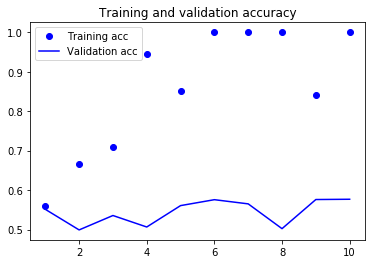

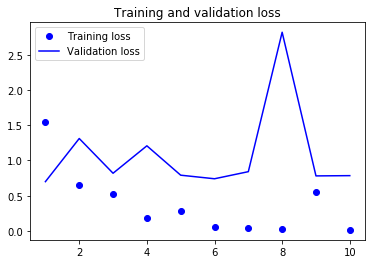

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



In [85]:
# Train without pre-trained model

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6995 - acc: 0.4800 - val_loss: 0.6911 - val_acc: 0.5272
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4900 - acc: 0.9750 - val_loss: 0.6899 - val_acc: 0.5353
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2578 - acc: 0.9950 - val_loss: 0.7008 - val_acc: 0.5384
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1037 - acc: 1.0000 - val_loss: 0.7009 - val_acc: 0.5370
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0465 - acc: 1.0000 - val_loss: 0.7016 - val_acc: 0.5417
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.7029 - val_acc: 0.5434
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.7149 - val_acc: 0.5453
Epoch 8/10
200/200 [========

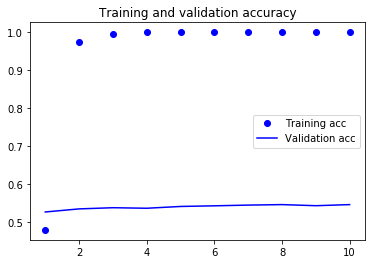

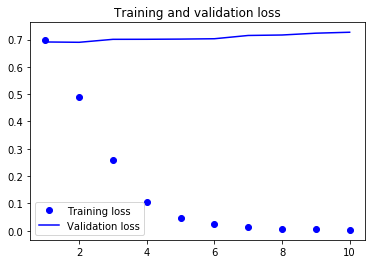

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [88]:
# Finally test it

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 60us/step


[0.7906434539985657, 0.57672]

In [ ]:
# Lets try recurrence

# board: SimpleRNN

In [90]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(
                                        num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [91]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.6260 - acc: 0.6531 - val_loss: 0.4385 - val_acc: 0.8234
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3843 - acc: 0.8464 - val_loss: 0.4862 - val_acc: 0.7824
Epoch 3/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.2962 - acc: 0.8858 - val_loss: 0.3497 - val_acc: 0.8640
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2358 - acc: 0.9093 - val_loss: 0.3421 - val_acc: 0.8630
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1978 - acc: 0.9264 - val_loss: 0.3847 - val_acc: 0.8646
Epoch 6/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1534 - acc: 0.9458 - val_loss: 0.5148 - val_acc: 0.7782
Epoch 7/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1117 - acc: 0.9625 - val_loss: 0.4241 - val_acc:

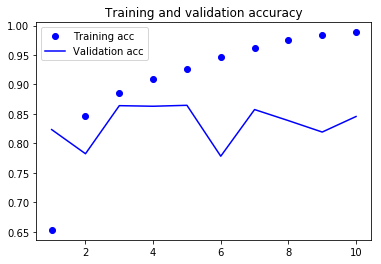

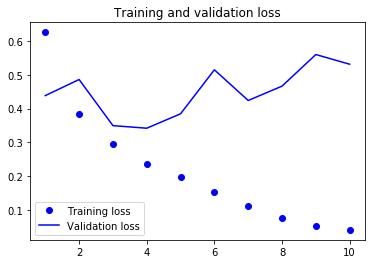

In [92]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [93]:
# LSTM

from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.5130 - acc: 0.7590 - val_loss: 0.3860 - val_acc: 0.8464
Epoch 2/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.2882 - acc: 0.8873 - val_loss: 0.3298 - val_acc: 0.8648
Epoch 3/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2270 - acc: 0.9126 - val_loss: 0.4698 - val_acc: 0.8150
Epoch 4/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2011 - acc: 0.9256 - val_loss: 0.3550 - val_acc: 0.8504
Epoch 5/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.1791 - acc: 0.9341 - val_loss: 0.3230 - val_acc: 0.8860
Epoch 6/10
20000/20000 [==============================] - 119s 6ms/step - loss: 0.1589 - acc: 0.9434 - val_loss: 0.3248 - val_acc: 0.8634
Epoch 7/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.1396 - acc: 0.9495 - val_loss: 0.4228 - v

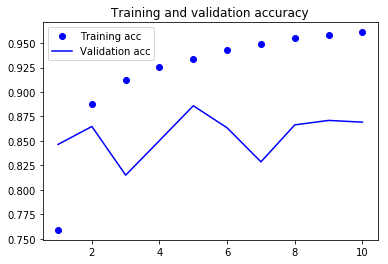

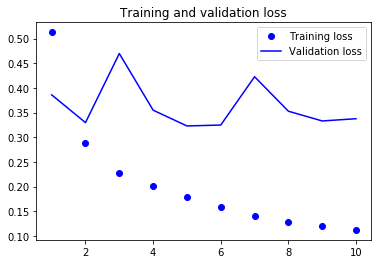

In [94]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [95]:
# A temperature-forecasting problem

import os

data_dir = './jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [96]:
import numpy as np

float_data = np.zeros((len(lines), len(header) -1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

In [97]:
import pandas as pd

df = pd.read_csv('jena_climate/jena_climate_2009_2016.csv')
float_data=df.as_matrix(columns=df.columns[1:])

df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


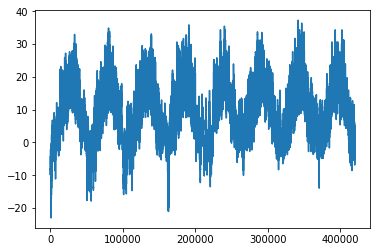

In [98]:
from matplotlib import pyplot as plt

temp = float_data[:,1] # temperature

plt.plot(range(len(temp)), temp)

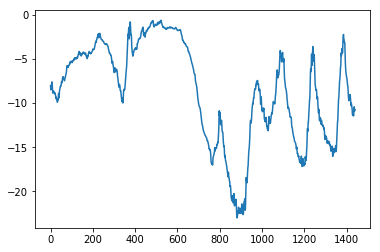

In [99]:
plt.plot(range(1440), temp[:1440])

In [100]:
lookback = 720 # 5 days back
steps = 6 # sampled once every hour *Why?*
delay = 144

In [101]:
# Normalize the data .. Why?

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std =  float_data[:200000].std(axis=0)
float_data /= std

In [102]:
# Generator to yield samples and their targers

def generator(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    
    while 1:
        
        if shuffle:
            rows = np.random.randint(
            min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows),
                           lookback//step,
                           data.shape[-1]))
        
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets
                


In [103]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 0,
                     max_index = 200000,
                     shuffle = True,
                     step = step,
                     batch_size = batch_size)

val_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 200001,
                     max_index = 300000,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

train_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 300001,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)


In [104]:
# Commen sense approach (like unbalanced class etc.)

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    
    print(np.mean(batch_maes))
    
evaluate_naive_method()


0.2896994197960971


In [113]:
std[1]*.29

2.567224733839344

In [114]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1)) # no activation layer

In [115]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
            steps_per_epoch=500,
            epochs=20,
            validation_data=val_gen,
            validation_steps=1000) # or val_steps

Epoch 1/20
500/500 [==============================] - 89s 179ms/step - loss: 11.4332 - val_loss: 2.9840
Epoch 2/20
500/500 [==============================] - 88s 175ms/step - loss: 2.2650 - val_loss: 2.9374
Epoch 3/20
500/500 [==============================] - 80s 159ms/step - loss: 6.9243 - val_loss: 4.7027
Epoch 4/20
500/500 [==============================] - 442s 885ms/step - loss: 1.5333 - val_loss: 0.9106
Epoch 5/20
500/500 [==============================] - 101s 203ms/step - loss: 4.5967 - val_loss: 1.4341
Epoch 6/20
500/500 [==============================] - 98s 196ms/step - loss: 0.7689 - val_loss: 0.6720
Epoch 7/20
500/500 [==============================] - 95s 190ms/step - loss: 1.7559 - val_loss: 0.5622
Epoch 8/20
500/500 [==============================] - 90s 180ms/step - loss: 0.4482 - val_loss: 1.0223
Epoch 9/20
500/500 [==============================] - 84s 169ms/step - loss: 1.0815 - val_loss: 0.4844
Epoch 10/20
500/500 [==============================] - 85s 170ms/step 

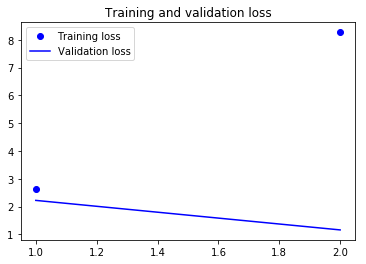

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
            steps_per_epoch=500,
            epochs=20,
            validation_data=val_gen,
            validation_steps=1000) #val_steps)

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
dropout=0.2,
recurrent_dropout=0.2,
input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                steps_per_epoch=500,
                epochs=40,
                validation_data=val_gen,
                validation_steps=100) #val_steps)

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
                    dropout=0.1,
                    recurrent_dropout=0.5,
                    return_sequences=True,
                    input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                    dropout=0.1,
                    recurrent_dropout=0.5))

model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen,
                    validation_steps=val_steps)

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Bidirectional(
        layers.GRU(32), input_shape=(None, float_data.shape[-1])))

model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
            steps_per_epoch=500,
            epochs=40,
            validation_data=val_gen,
            validation_steps=val_steps)
